In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (13730, 167)
Test data shape: (4576, 47)


In [4]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[:15], '\n')
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[-10:])

NU_NOTA_MT                 1.000000
NU_NOTA_CN                 0.584941
NU_NOTA_CH                 0.529594
NU_NOTA_LC                 0.494695
NU_NOTA_REDACAO            0.379376
TP_DEPENDENCIA_ADM_ESC     0.373233
NU_NOTA_COMP3              0.350307
NU_NOTA_COMP5              0.343337
NU_NOTA_COMP4              0.342282
NU_NOTA_COMP2              0.335638
NU_NOTA_COMP1              0.299402
CO_MUNICIPIO_NASCIMENTO    0.113416
CO_UF_NASCIMENTO           0.112236
CO_MUNICIPIO_PROVA         0.109433
CO_MUNICIPIO_RESIDENCIA    0.108850
Name: NU_NOTA_MT, dtype: float64 

IN_MARCA_PASSO             NaN
IN_SONDA                   NaN
IN_MEDICAMENTOS            NaN
IN_SALA_INDIVIDUAL         NaN
IN_SALA_ESPECIAL           NaN
IN_SALA_ACOMPANHANTE       NaN
IN_MOBILIARIO_ESPECIFICO   NaN
IN_MATERIAL_ESPECIFICO     NaN
TP_PRESENCA_LC             NaN
TP_PRESENCA_MT             NaN
Name: NU_NOTA_MT, dtype: float64


In [5]:
#features = ['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
            'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
features_corr = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
                 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
df_train = train[features_corr]
df_test = test[features]

In [6]:
df_train.isnull().sum()

NU_NOTA_MT         3597
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [7]:
df_train.shape

(13730, 10)

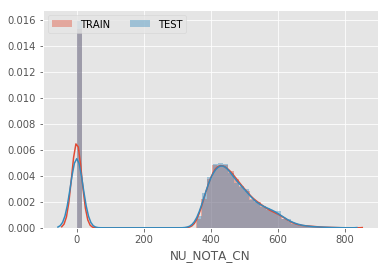

In [8]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [9]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo na base de train
#df_train = df_train.loc[
#      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
#    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
#]

In [10]:
#df_test = df_test.loc[
#      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
 #   & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
#]

In [11]:
df_train.isnull().sum()

NU_NOTA_MT         3597
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [12]:
df_test.isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

In [13]:
df_train['NU_NOTA_MT'].fillna(0,inplace=True)
df_train['NU_NOTA_CN'].fillna(0,inplace=True)
df_train['NU_NOTA_CH'].fillna(0,inplace=True)
df_train['NU_NOTA_LC'].fillna(0,inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(0,inplace=True)


df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

/home/eduardo/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:

df_test['NU_NOTA_CN'].fillna(0,inplace=True)
df_test['NU_NOTA_CH'].fillna(0,inplace=True)
df_test['NU_NOTA_LC'].fillna(0,inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(0,inplace=True)

df_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0,inplace=True)

In [15]:
df_train.describe()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000
mean,356.092607,356.621515,398.923911,381.166737,390.447633,88.423307,82.596067,78.838310,83.487618,57.102331
std,228.844193,213.282315,237.174594,234.648409,267.749316,58.592381,57.112963,55.469523,57.460251,50.263122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,365.625000,345.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,422.500000,433.100000,499.600000,486.000000,480.000000,120.000000,100.000000,100.000000,100.000000,60.000000
75%,504.400000,493.200000,564.400000,548.300000,580.000000,120.000000,120.000000,120.000000,120.000000,100.000000
max,952.000000,806.400000,807.000000,763.600000,1000.000000,200.000000,200.000000,200.000000,200.000000,200.000000


In [16]:
df_test.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000
mean,355.886167,398.052906,379.546613,389.278846,88.282343,82.591783,78.509615,83.304196,56.590909
std,213.372420,237.129999,233.543656,266.194563,58.220045,56.926108,55.078753,57.253039,50.008127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.975000,345.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,432.450000,499.450000,483.100000,480.000000,120.000000,100.000000,100.000000,100.000000,60.000000
75%,493.325000,562.200000,544.600000,580.000000,120.000000,120.000000,120.000000,120.000000,100.000000
max,778.900000,773.600000,708.900000,980.000000,200.000000,200.000000,200.000000,200.000000,200.000000


In [17]:
y_train = df_train['NU_NOTA_MT']
df_train.drop('NU_NOTA_MT', axis=1, inplace=True)
x_train = df_train
x_test = df_test[features]
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

/home/eduardo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)    


In [19]:
regressor.fit(x_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
x_test = df_test[features] 
x_test = sc.transform(x_test)

In [21]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [22]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 40.31835824
MSE: 3639.15202359
RMSE: 60.32538457


In [23]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 40.31835824
MSE: 3639.15202359
RMSE: 60.32538457


In [24]:
y_pred_test

array([417.8104, 442.2956, 595.1624, ..., 692.0697, 443.1866,   0.    ])

In [25]:
submission = pd.DataFrame()
submission['NU_INSCRICAO'] = test.NU_INSCRICAO

In [26]:
submission['NU_NOTA_MT'] = y_pred_test
submission.sample(20)

,NU_INSCRICAO,NU_NOTA_MT
1104,7b309e8114f95274ac95aad6697df953fce1d861,437.8625
218,d4e97da32ccb6987ec074aa48c24ce949c05a78c,422.3131
4382,de9c7f5daff1ccb4c1d24a44b5dfb1767b02ec58,434.9829
454,4d0b3bca1ec9337bb27b9d6710702ebb79a90046,510.9163
1618,82918decf898ff34c3fb8f74dcc741d89f2e887a,421.7751
1455,1d2002450bef0d038cfff583a8a45c1152adff4f,506.5411
4064,aa7a3291afd542100175a10408549056827fe618,412.0222
202,8f2c4684ec70392c718c278b10b04ddfbd4ced1f,563.0030
2437,83fa6da48f33782c6dcc3ff3a64a94022221df13,411.1727
4248,0a0c3a10bee415ae2d8a5e70de450e8a94c211be,404.4943


In [27]:
submission.to_csv('submission.csv', index=False, header=True)

SEU SCORE: 93.66%